## Лабораторна робота 4. **REGRESSION** 📈

# Опис вибірки "Motorbike Ambulance Calls"


Аварії за участю мотоциклів та відповідні виклики швидкої допомоги сильно залежать від екологічних та сезонних умов, таких як погодні умови, опади, день тижня, сезон, година дня тощо. Дані збирались протягом двох років щогодини та потім співвідносилися з відповідною погодою та сезонністю.

Основні характеристики вибірки `motorbike_ambulance_calls.csv`:

              - index: record index
              - date : date
              - season : season (1:springer, 2:summer, 3:fall, 4:winter)
              - yr : year (0: 2011, 1:2012)
              - mnth : month ( 1 to 12)
              - hr : hour (0 to 23)
              - holiday : whether day is holiday or not
              - weekday : day of the week
              - workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
              -  weathersit :
                      - 1: Clear, Few clouds, Partly cloudy, Partly cloudy
                      - 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
                      - 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
                      - 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
              - temp : Normalized temperature in Celsius. The values are divided to 41 (max)
              - atemp: Normalized feeling temperature in Celsius. The values are divided to 50 (max)
              - hum: Normalized humidity. The values are divided to 100 (max)
              - windspeed: Normalized wind speed. The values are divided to 67 (max)
              - cnt: count of total ambulance calls

## Імпорт необхідних бібліотек та завантаження даних

**Завдання 1** підготовка даних до опрацювання

1. завантажте вибірку `motorbike_ambulance_calls.csv`;   
2. підключіть необхідні бібліотеки;  
3. вивести основну статистичну інформацію по числовим змінним;  
4. окремо вивести максимальні та мінімальні значення по всім змінним;  
5. вивести розмірність датасету;

In [694]:
import pandas as pd
import numpy as np
import scipy as sc
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [695]:
def get_data(data_path: str):
  data = pd.read_csv(data_path)
  return data

In [696]:
data = get_data(data_path='motorbike_ambulance_calls.csv')
macdf = pd.DataFrame(data)

In [697]:
macdf.describe()

,index,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,189.463088
std,5017.0295,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,181.387599
min,1.0000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,40.000000
50%,8690.0000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,142.000000
75%,13034.5000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,281.000000
max,17379.0000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,977.000000


In [698]:
macdf.max()

index          17379
date          9/9/12
season        winter
yr                 1
mnth              12
hr                23
holiday            1
weekday            6
workingday         1
weathersit         4
temp             1.0
atemp            1.0
hum              1.0
windspeed     0.8507
cnt              977
dtype: object

In [699]:
macdf.min()

index              1
date          1/1/11
season        autumn
yr                 0
mnth               1
hr                 0
holiday            0
weekday            0
workingday         0
weathersit         1
temp            0.02
atemp            0.0
hum              0.0
windspeed        0.0
cnt                1
dtype: object

In [700]:
macdf.shape

(17379, 15)

**Завдання 2** перевірити типи даних та перевірте кількість даних по кожній змінній.

In [701]:
macdf.dtypes, macdf.count()

(index           int64
 date           object
 season         object
 yr              int64
 mnth            int64
 hr              int64
 holiday         int64
 weekday         int64
 workingday      int64
 weathersit      int64
 temp          float64
 atemp         float64
 hum           float64
 windspeed     float64
 cnt             int64
 dtype: object,
 index         17379
 date          17379
 season        17379
 yr            17379
 mnth          17379
 hr            17379
 holiday       17379
 weekday       17379
 workingday    17379
 weathersit    17379
 temp          17379
 atemp         17379
 hum           17379
 windspeed     17379
 cnt           17379
 dtype: int64)

**Завдання 3** пепевірте всі змінні на наявність пропусків.

In [702]:
macdf.isnull().sum()

index         0
date          0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
cnt           0
dtype: int64

**Висновки з 1-3 завдання (детальні)**

1. Більшість аварій на диво сталися в нормальних погодних умовах. Середня темпаратура 20C та вологість 62,7 що є досить багато та говорить що дорога ймовірно була мокра або був туман.
2. Більшість даних є категоріальними (бікатегоріальні, мультикатегоріальні).
3. Пропусків немає. Це означає що датасет є релевантний і може далі використовуватись в аналітиці.



**Завдання 4** перетворіть змінну `date` в **date type**. Визначте часові межі датасету.

In [703]:
def tranform_date(df: pd.DataFrame, date_col_name: str):
  macdf['date'] = pd.to_datetime(macdf['date'])
  return macdf['date']
  
data = tranform_date(data, 'date')

(data)

C:\Users\mn508\AppData\Local\Temp\ipykernel_6800\2606859726.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  macdf['date'] = pd.to_datetime(macdf['date'])


0       2011-01-01
1       2011-01-01
2       2011-01-01
3       2011-01-01
4       2011-01-01
           ...    
17374   2012-12-31
17375   2012-12-31
17376   2012-12-31
17377   2012-12-31
17378   2012-12-31
Name: date, Length: 17379, dtype: datetime64[ns]

In [704]:
def get_time_limits(df: pd.DataFrame, date_col_name: str):
  first_day = data.min()
  last_day = data.max()
  print(f"Перший день спостереження - {first_day}.\nОстанній день спостереження - {last_day}")

In [705]:
get_time_limits(macdf, 'date')

Перший день спостереження - 2011-01-01 00:00:00.
Останній день спостереження - 2012-12-31 00:00:00


# Аналіз категоріальних змінних

**Завдання 5** виділити категоріальні змінні в окремий датасет







In [706]:
data_categorical = macdf[['season', 'holiday', 'workingday', 'weathersit', 'yr', 'mnth', 'hr', 'weekday']].astype('category')
data_categorical

,season,holiday,workingday,weathersit,yr,mnth,hr,weekday
0,spring,0,0,1,0,1,0,6
1,spring,0,0,1,0,1,1,6
2,spring,0,0,1,0,1,2,6
3,spring,0,0,1,0,1,3,6
4,spring,0,0,1,0,1,4,6
...,...,...,...,...,...,...,...,...
17374,spring,0,1,2,1,12,19,1
17375,spring,0,1,2,1,12,20,1
17376,spring,0,1,1,1,12,21,1
17377,spring,0,1,1,1,12,22,1


**Завдання 6** перетворіть змінну `season` в числову шкалу.

In [707]:
def encode_season(df: pd.DataFrame, season_col_name: str):
  map_s = {'spring': 0, 'summer': 1, 'autumn': 2, 'winter': 3}
  df = df[season_col_name].map(map_s)
  return df
  
macdf['season'] = encode_season(macdf, 'season')

# macdf[macdf['season'] == 2]
macdf

,index,date,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,2011-01-01,0,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,16
1,2,2011-01-01,0,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,40
2,3,2011-01-01,0,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,32
3,4,2011-01-01,0,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,13
4,5,2011-01-01,0,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,0,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,119
17375,17376,2012-12-31,0,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,89
17376,17377,2012-12-31,0,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,90
17377,17378,2012-12-31,0,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,61


**Завдання 7** побудувати графіки `countplot` по всім категоріальним змінним

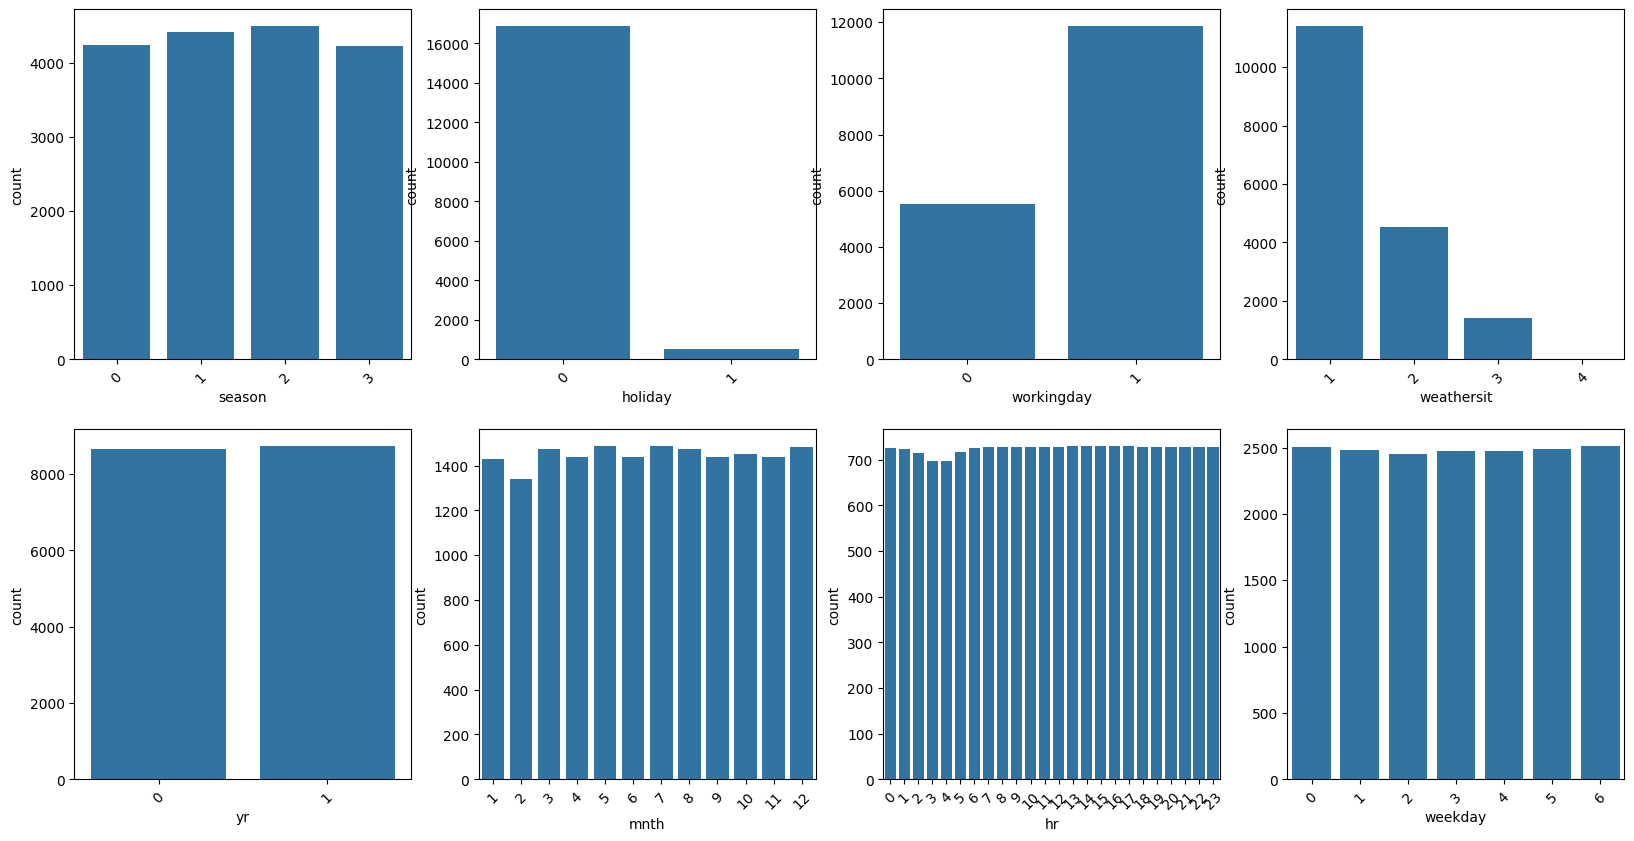

In [708]:
fig, ax = plt.subplots(2, 4, figsize=(20, 10))
for variable, subplot in zip(data_categorical, ax.flatten()):
    sns.countplot(x=variable, data=macdf, ax=subplot)
    

    for label in subplot.get_xticklabels():
        label.set_rotation(45)


**Висновки з 5-7 завдання (детальні)**

1. Я виділив 8 категоріальних змінний в окремий датасет.
2. Тут я перетворив текстові значення на числові використовуючи мапінг.
3. Найбільше аварій осінню, найменше зимою особливо в лютому. Аварії стаються рівномірно але є невелике зменшення в 3-4 годинах ранку.

# Аналіз числових змінних

**Завдання 8** виділити числові змінні в окремий датасет

In [709]:
data_numerical = macdf[['index', 'temp', 'atemp', 'hum', 'windspeed', 'cnt']].astype(float)
data_numerical

,index,temp,atemp,hum,windspeed,cnt
0,1.0,0.24,0.2879,0.81,0.0000,16.0
1,2.0,0.22,0.2727,0.80,0.0000,40.0
2,3.0,0.22,0.2727,0.80,0.0000,32.0
3,4.0,0.24,0.2879,0.75,0.0000,13.0
4,5.0,0.24,0.2879,0.75,0.0000,1.0
...,...,...,...,...,...,...
17374,17375.0,0.26,0.2576,0.60,0.1642,119.0
17375,17376.0,0.26,0.2576,0.60,0.1642,89.0
17376,17377.0,0.26,0.2576,0.60,0.1642,90.0
17377,17378.0,0.26,0.2727,0.56,0.1343,61.0


**Завдання 9** побудуйте гістограми розподілу по всім числовим змінним

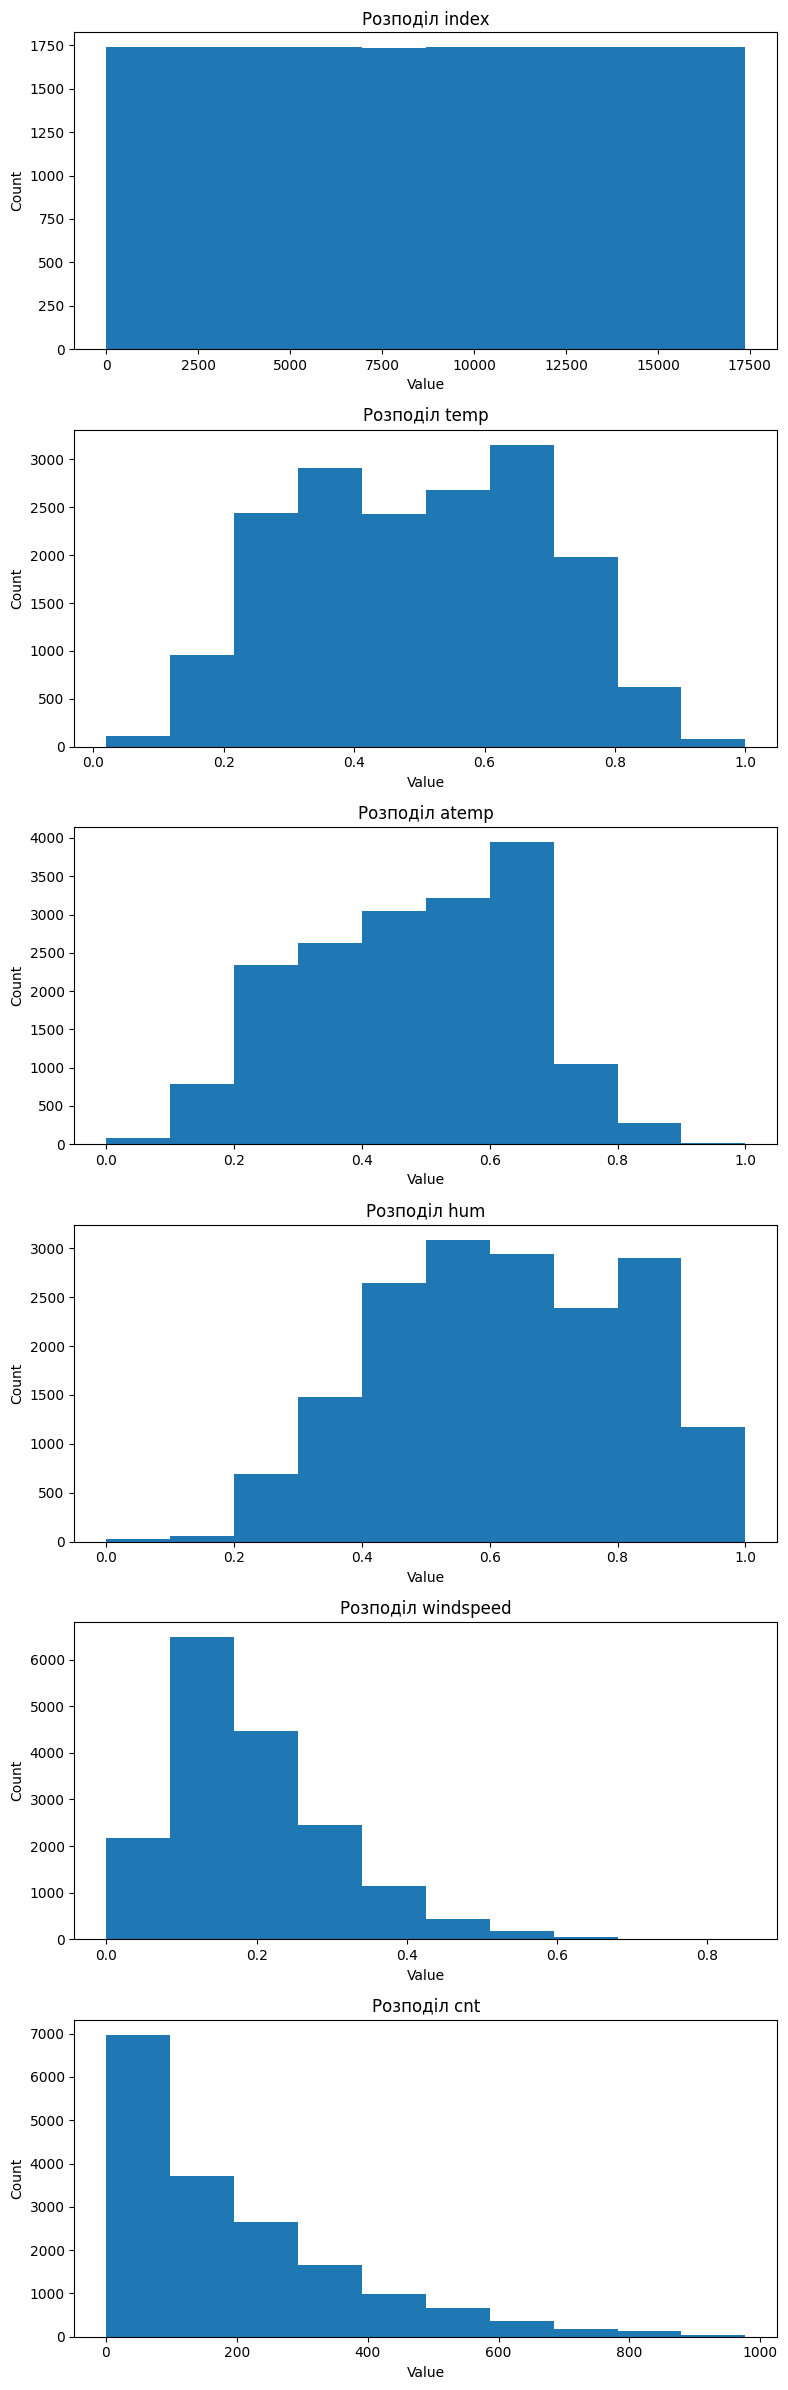

In [710]:
fig, ax = plt.subplots(len(data_numerical.columns), 1, figsize=(8, 4 * len(data_numerical.columns)))
for i, column in enumerate(data_numerical.columns):
    ax[i].hist(data_numerical[column])
    ax[i].set_title(f'Розподіл {column}')
    ax[i].set_xlabel('Value')
    ax[i].set_ylabel('Count')

plt.tight_layout()
plt.show()

**Завдання 10** побудуйте гістограму розподілу цільової змінної та розрахуйте коефіціент нахилу

Scew for cnt: 1.2774116037490577


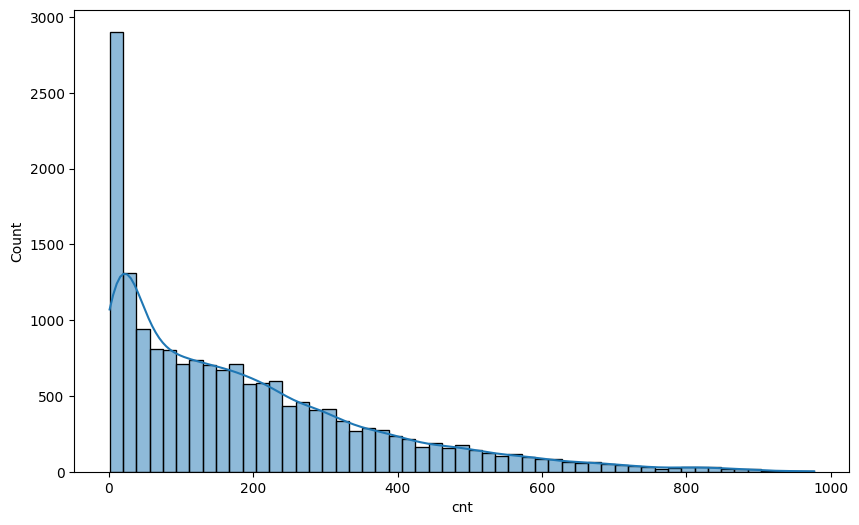

In [711]:
plt.figure(figsize=(10, 6))

sns.histplot(macdf['cnt'], kde=True)


skev = macdf['cnt'].skew()
print(f"Scew for cnt: {skev}")

**Висновки з 8-10 завдання (детальні)**

1. Сюда ми поміщаємо 6 змінних, які можна описати числами.
2. Хвіст розподілу вологості розтягується праворуч, що означає що більші значення вологості зустрічаються частіше.
3. У нас нахил < 0 це означає що у нас важкий лівий хвіст. Коефіцієнт асиметрії позитивний значить хвіст розподілу довше лівого.

# Аналіз взаємозв'язків між числовими і категоріальними змінними

**Завдання 11** побудуйте графіки співвідношення `scatterplot` між всіма числовими змінними і цільовою змінною `cnt`

In [712]:
data_numerical = data_numerical.columns.tolist()

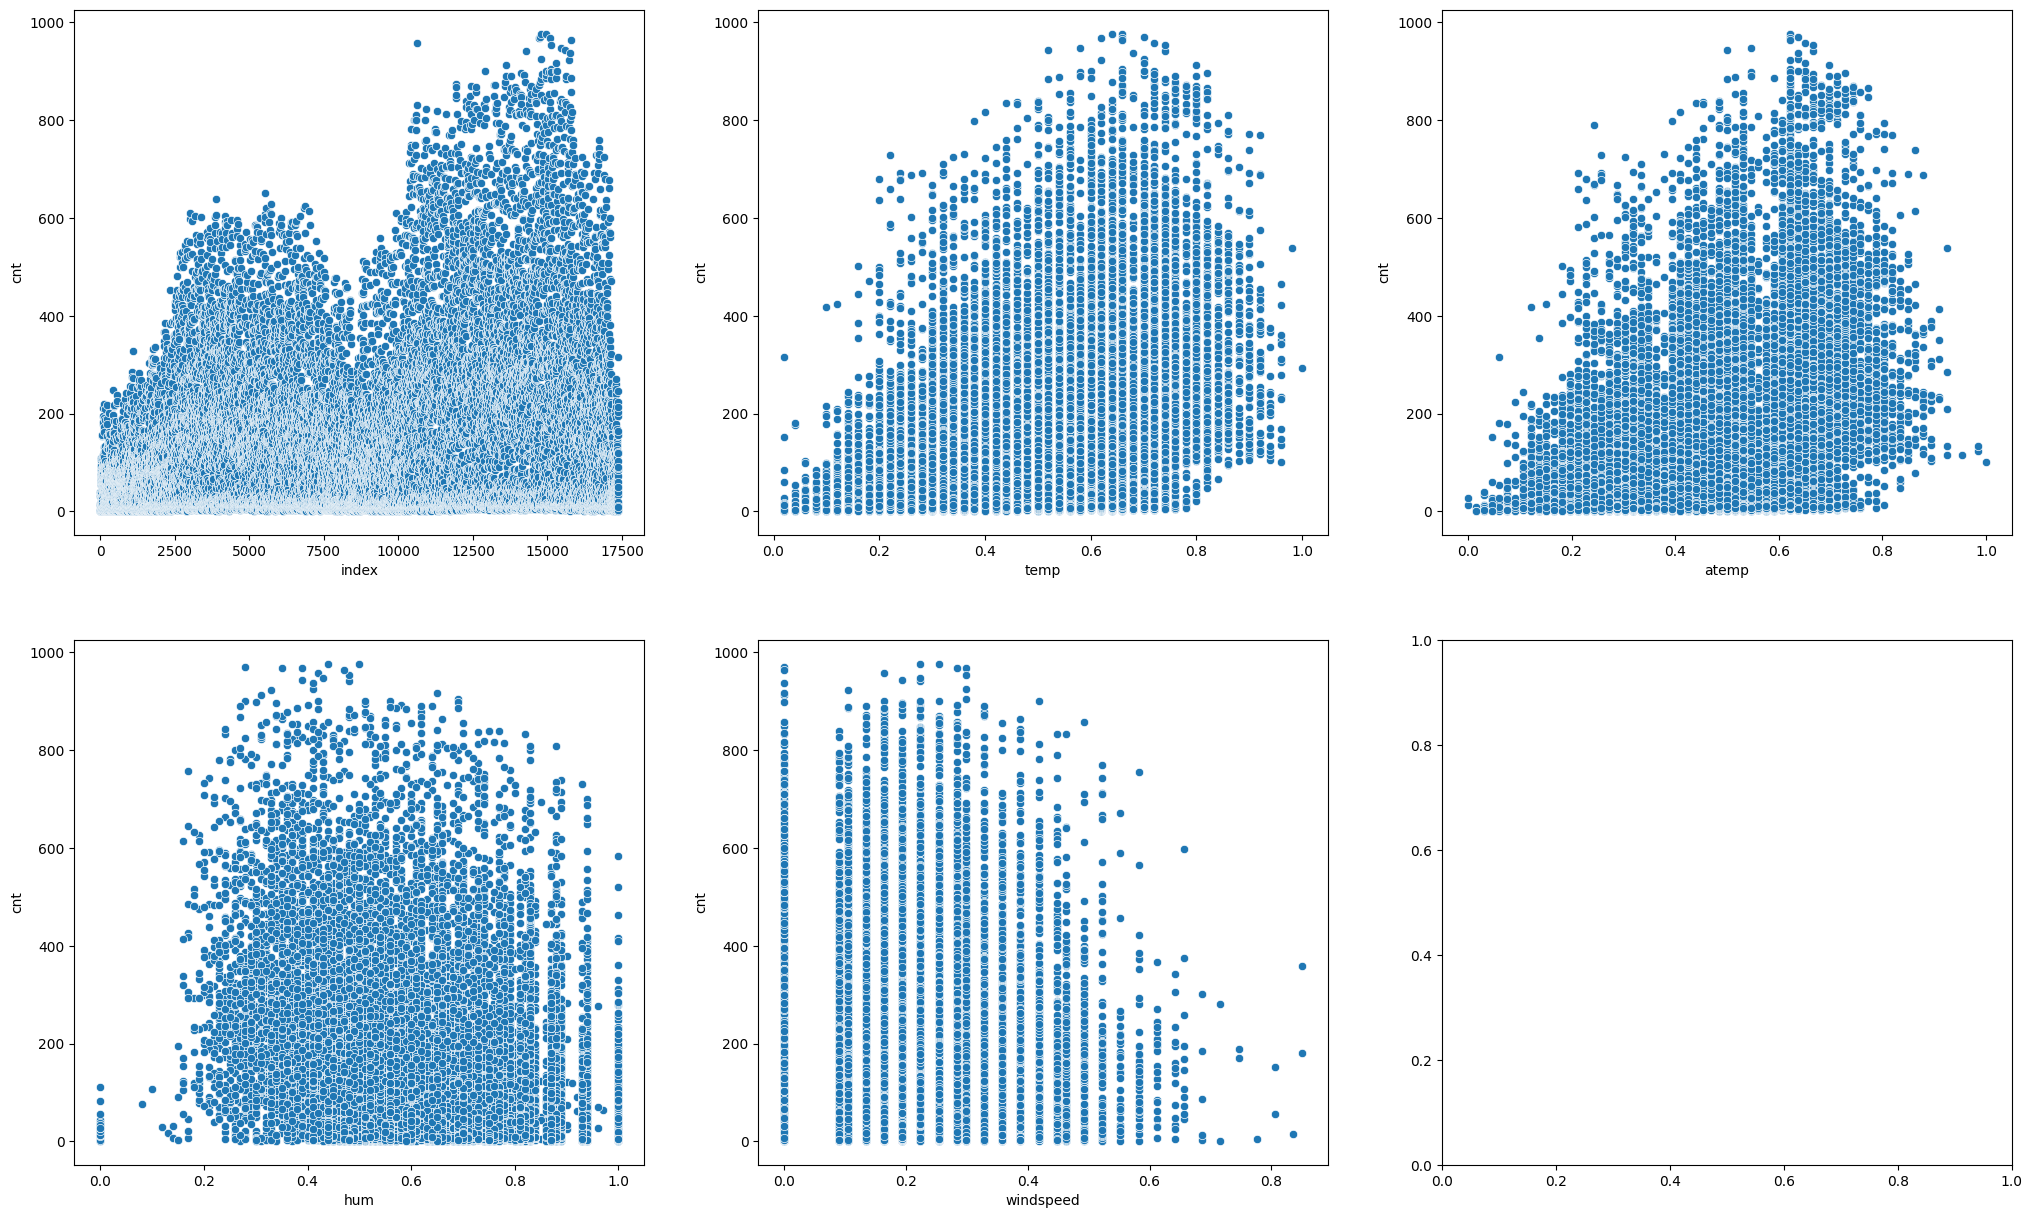

In [713]:
fig, ax = plt.subplots(2,3, figsize=(25, 15))
for var, subplot in zip(macdf[data_numerical].drop('cnt', axis =1), ax.flatten()):
    sns.scatterplot(data=macdf, x=var, y='cnt', ax=subplot)

**Завдання 12** побудуйте графіки співвідношення `boxplot` [boxplot](https://matplotlib.org/stable/gallery/statistics/boxplot_demo.html) між категоріальними змінними і цільовою змінною `cnt`.

In [714]:
data_categorical = data_categorical.columns.tolist()

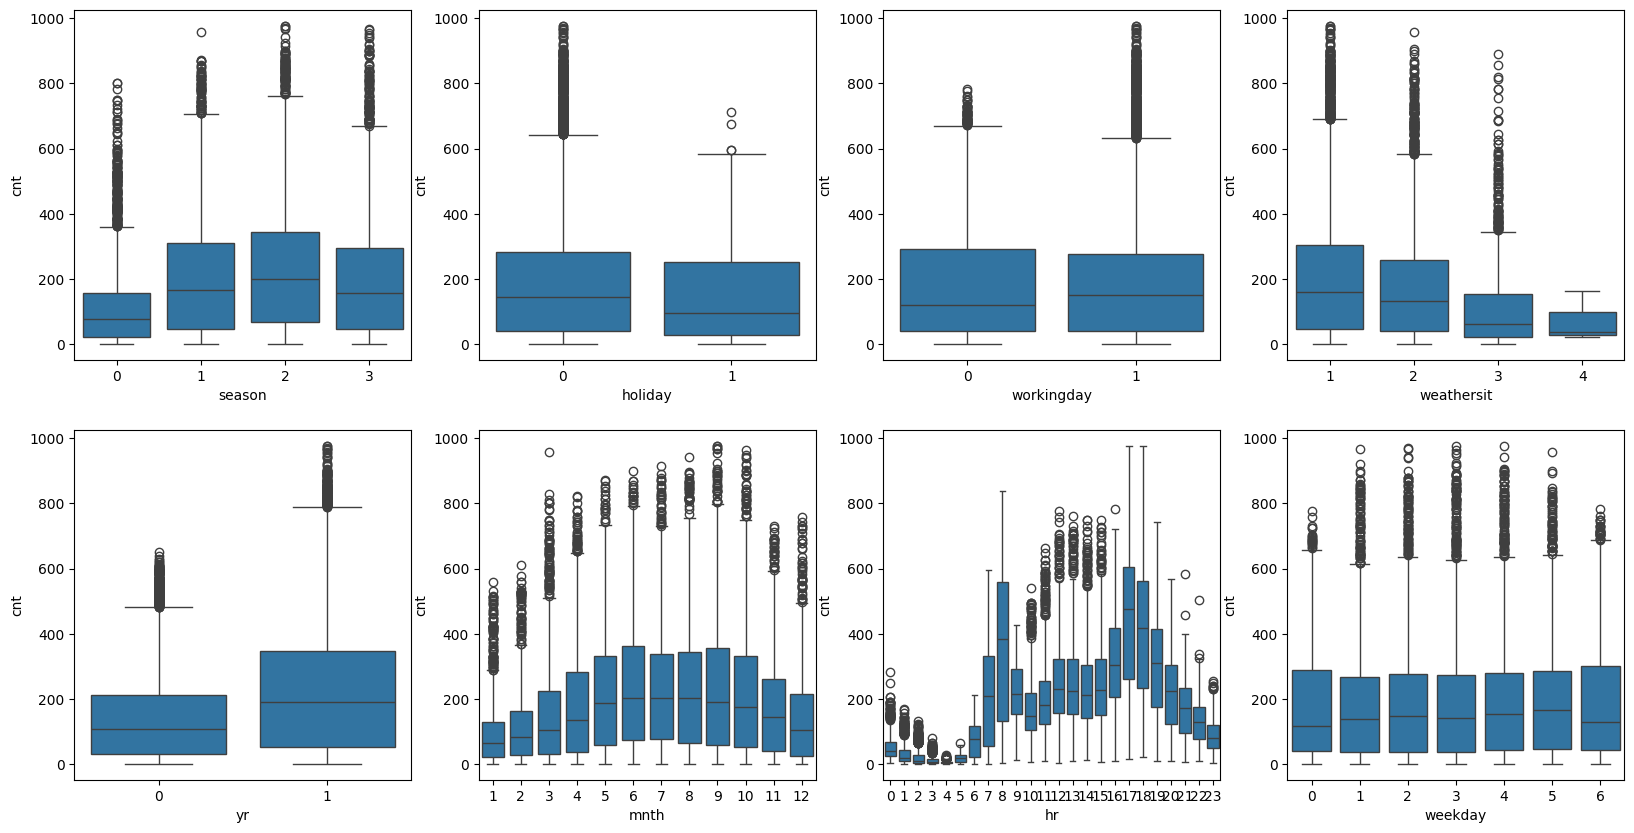

In [715]:
fig, ax = plt.subplots(2, 4, figsize=(20, 10))
for var, subplot in zip(data_categorical, ax.flatten()):
        sns.boxplot(x=var, y='cnt', data=macdf, ax=subplot)

# plt.tight_layout()

**Висновки з 11-12 завдання (детальні)**



1. Чим більша темпаратура тим більше повідомлень про ДТП. 
2. Чим сильніший вітер тим менша кільсть повідомлень про ДТП (може просто людей було менше на вулиці).
3. 0 сезон має найнижчі медіани та квартилі, що означає що подій в ньму найменше. В 2012 році кількість ДТП зросла. Вночі а особливо перед сходом сонця ДТП найменше. В робочі дні ДТП було більше.



**Завдання 13** Побудувати матрицю кореляції:  

1.   Вирахувати кореляційні коефіціенти для набору данних за методом Пірсона
2.   Відобразити отриману матрицю коефіціентів у вигляді теплокарти  
3.   Вирахувати кореляційні коефіціенти для набору данних за методом Спірмана
4.   Відобразити отриману матрицю коефіціентів у вигляді теплокарти

5. Описати отримані результати, спираючись на значення коефіціентів кореляції та пояснити в чому відмінність обраних методів.

<Axes: >

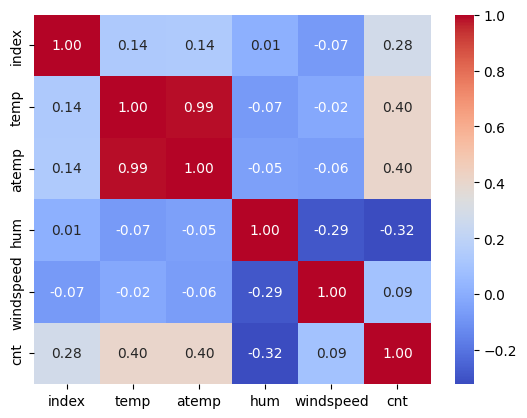

In [716]:
coorelationp = macdf[data_numerical].corr(method='pearson')
sns.heatmap(coorelationp, annot=True, fmt=".2f", cmap='coolwarm')

<Axes: >

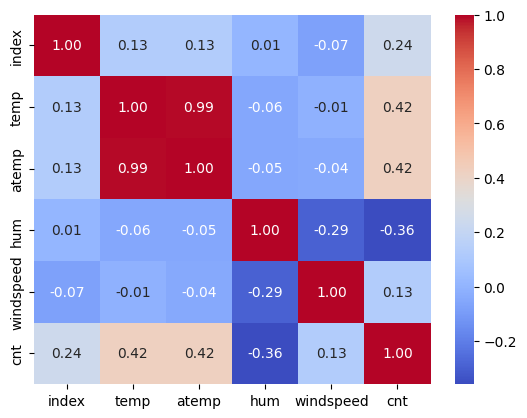

In [717]:
coorelations = macdf[data_numerical].corr(method='spearman')
sns.heatmap(coorelations, annot=True, fmt=".2f", cmap='coolwarm')

1. Висока залежність віж темпаратурою і темпаратурою що вічувається.
2. З підвищенням температури кількість ДТП зростає.
3. З вологості чи вітру температури кількість ДТП знижується.

1. В кореляції Пірсона одне або кілька значень, які значно відрізняються від інших, можуть значно вплинути на коефіцієнт кореляції. Кореляція Спірмена є більш стійкою до викидів.
2. Кореляція Пірсона вимагає щоб змінні були неперервними та нормально розподілені.
3. Кореляція Спірмена вимірює силу та напрямок монотонного зв'язку між двома змінними.

**Завдання 14** 
1. побудувати модель лінійної регресії:
2. видалити змінні, які НЕ є релевантними;

3. поділити вибірку на `train`, `test` та `validation` в пропорції `70/30`;  

4. провести навчання моделі лінійної регресії;

1. Для подальшої роботи з моделями для кожної категоріальної змінної ми створимо фіктивні змінні, щоб уникнути неправильного порядку категорій. [get_dummies](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.get_dummies.html)

In [718]:
def get_dummies(df: pd.DataFrame):
    features = pd.concat([df,
                          pd.get_dummies(df['season'], prefix='season'),
                          pd.get_dummies(df['holiday'], prefix='holiday'),
                          pd.get_dummies(df['workingday'], prefix='workingday'),
                          pd.get_dummies(df['mnth'], prefix='mnth'),
                          pd.get_dummies(df['weekday'], prefix='weekday'),
                          pd.get_dummies(df['weathersit'], prefix='weathersit'),
                          pd.get_dummies(df['yr'], prefix='yrs'),
                          pd.get_dummies(df['hr'], prefix='hr'),

                         ], axis=1)
    features = features.drop(['season',
                              'holiday',
                              'workingday',
                            'mnth', 
                            'weekday', 
                            'weathersit',
                            'yr',
                            # 'hr'
                            ], axis = 1)
    # print(features)
    return features

get_dummies(macdf).columns


Index(['index', 'date', 'hr', 'temp', 'atemp', 'hum', 'windspeed', 'cnt',
       'season_0', 'season_1', 'season_2', 'season_3', 'holiday_0',
       'holiday_1', 'workingday_0', 'workingday_1', 'mnth_1', 'mnth_2',
       'mnth_3', 'mnth_4', 'mnth_5', 'mnth_6', 'mnth_7', 'mnth_8', 'mnth_9',
       'mnth_10', 'mnth_11', 'mnth_12', 'weekday_0', 'weekday_1', 'weekday_2',
       'weekday_3', 'weekday_4', 'weekday_5', 'weekday_6', 'weathersit_1',
       'weathersit_2', 'weathersit_3', 'weathersit_4', 'yrs_0', 'yrs_1',
       'hr_0', 'hr_1', 'hr_2', 'hr_3', 'hr_4', 'hr_5', 'hr_6', 'hr_7', 'hr_8',
       'hr_9', 'hr_10', 'hr_11', 'hr_12', 'hr_13', 'hr_14', 'hr_15', 'hr_16',
       'hr_17', 'hr_18', 'hr_19', 'hr_20', 'hr_21', 'hr_22', 'hr_23'],
      dtype='object')

In [719]:
features = get_dummies(macdf)

2. На основі змінної часу створіть нову змінну, яка відповідатиме за день і ніч.

In [720]:
# features.columns
def dncheck(hr):
    return False if 7 <= hr <= 20 else True


features['night_hours'] = features['hr'].apply(dncheck)

features = features.drop('hr', axis = 1)

## Модель лінійної регрессії  

[train_linear_model](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)

Після отримання фіктивних змінних потрібно видалити по одній з кожної категорії, щоб запобігти мультиколінеарності. Також видаляємо ще два атрибути `date` та `atemp` - поясніть чому?

In [721]:
features_lr = features.drop(['index', 'cnt', 'season_0', 'mnth_4', 'weekday_0', 'weathersit_1', 'hr_0', 'atemp', 'date'], axis = 1)
print(features_lr.columns)

Index(['temp', 'hum', 'windspeed', 'season_1', 'season_2', 'season_3',
       'holiday_0', 'holiday_1', 'workingday_0', 'workingday_1', 'mnth_1',
       'mnth_2', 'mnth_3', 'mnth_5', 'mnth_6', 'mnth_7', 'mnth_8', 'mnth_9',
       'mnth_10', 'mnth_11', 'mnth_12', 'weekday_1', 'weekday_2', 'weekday_3',
       'weekday_4', 'weekday_5', 'weekday_6', 'weathersit_2', 'weathersit_3',
       'weathersit_4', 'yrs_0', 'yrs_1', 'hr_1', 'hr_2', 'hr_3', 'hr_4',
       'hr_5', 'hr_6', 'hr_7', 'hr_8', 'hr_9', 'hr_10', 'hr_11', 'hr_12',
       'hr_13', 'hr_14', 'hr_15', 'hr_16', 'hr_17', 'hr_18', 'hr_19', 'hr_20',
       'hr_21', 'hr_22', 'hr_23', 'night_hours'],
      dtype='object')


1. Бо дата є специфічною для кожного окремого запису і в нас і так вже є аналог в фічах. Atemp сильно корелює з temp.
2. Ми видаляємо щоб уникнути dummy variable trap.

In [722]:
def get_train_data(df: pd.DataFrame, target:str, test_size:float):
  X = features_lr
  y = features['cnt'] 
  X_train, X_test, y_train, y_test =  train_test_split(X, y, test_size=test_size, random_state=42, shuffle = True)
  return X_train, X_test, y_train, y_test

In [723]:
X_train, X_test, y_train, y_test = get_train_data(features_lr, 'cnt', 0.3)

In [724]:
def train_linear_model(X_train, y_train):
    model = LinearRegression()
    model.fit(X_train, y_train)
    return model

model = train_linear_model(X_train, y_train)

In [725]:
# predict
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)
# scores
print('MSE train: {:.3f}, test: {:.3f}'.format(
        mean_squared_error(y_train, y_train_pred),
        mean_squared_error(y_test, y_test_pred)))
print('R^2 train: {:.3f}, test: {:.3f}'.format(
        r2_score(y_train, y_train_pred),
        r2_score(y_test, y_test_pred)))

MSE train: 10451.131, test: 10101.221
R^2 train: 0.688, test: 0.680


Оскільки в нашій моделі є багато незалежних змінних, ми не можемо відобразити їх залежність у двовимірному просторі, але ми можемо побудувати графік взаємозв'язку між залишками моделі та передбачуваними значеннями, що також допоможе нам оцінити якість моделі.

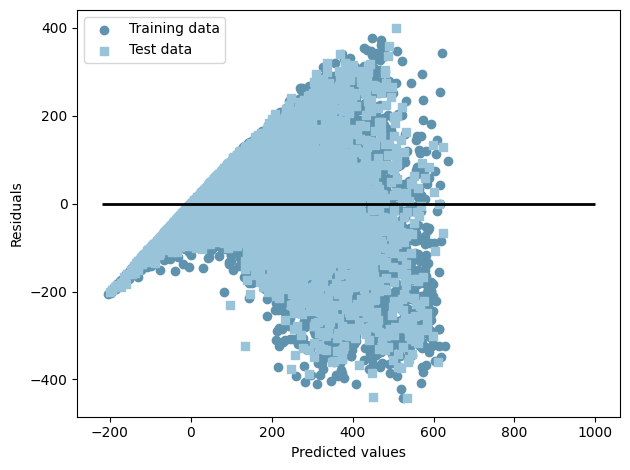

In [726]:
plt.scatter(y_train_pred,  y_train_pred - y_train,
            c='#5f93ad', marker='o', label='Training data')
plt.scatter(y_test_pred,  y_test_pred - y_test,
            c='#98c3d9', marker='s', label='Test data')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=-220, xmax=1000, lw=2, color='#000000')
plt.tight_layout()

**Висновки з завдання (детальні)**

1. MSE чим менше значення до 0 тим краще. Воно вказує на різницю між прогнозами і реальними значеннями.
2. R^2 Коефіцієнт детермінації вказує на те що точність моделі 68%.

